In [1]:
import utils
import circular
import unbiasedmcmc as umcmc
import experiments
    
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

### Test experiment

Finished solving
Output directory is plots/discrete_d300_N100_reps100/
Breaking at iteration=99


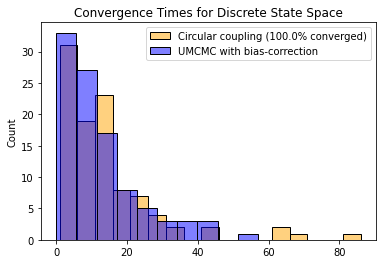

Recomputing ccoupler for N=10
Recomputing ccoupler for N=20
Recomputing ccoupler for N=30
Recomputing ccoupler for N=40
Recomputing ccoupler for N=50
Recomputing ccoupler for N=60
Recomputing ccoupler for N=70
Recomputing ccoupler for N=80
Recomputing ccoupler for N=90
Recomputing ccoupler for N=100
[array([[148.554     ],
       [147.1945    ],
       [150.098     ],
       [149.69475   ],
       [148.757     ],
       [149.40916667],
       [148.91314286],
       [148.647375  ],
       [148.38288889],
       [148.1107    ]]), array([[3.27747599],
       [2.21534364],
       [1.82899376],
       [1.5723374 ],
       [1.33335071],
       [1.20926666],
       [1.05425704],
       [0.99994538],
       [0.97255672],
       [0.90876883]]), array([[0.22031498],
       [0.17608321],
       [0.1671044 ],
       [0.13265451],
       [0.11399264],
       [0.12927968],
       [0.09405095],
       [0.07484842],
       [0.0641877 ],
       [0.05160315]]), array([[141.99904803],
       [142.7638127

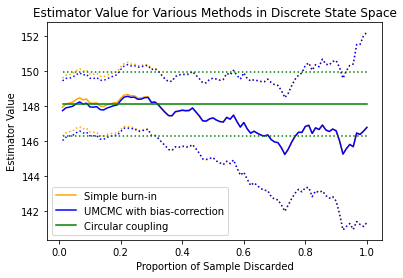

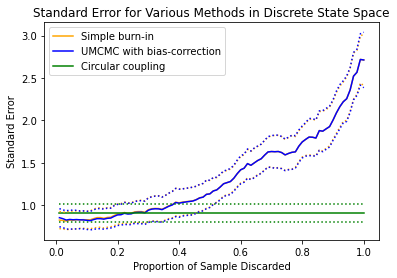

In [2]:
N = 100
reps = 100
d = 300
pi, K = utils.generate_discrete_chain(d=d, seed=20)
savename = f"discrete_d{d}_N{N}_reps{reps}"
print("Finished solving")
experiments.compare_methods(
    UClass=umcmc.DiscreteUMCMC,
    CClass=circular.DiscreteCircularCoupler,
    N=N,
    reps=reps,
    K=K,
    setting="Discrete State Space",
    savename=savename
)

### Ising Experiment

In [ ]:
D = 16
N = 10
reps = 5000
theta = 0.3
setting = "Ising Model"
savename = f"ising_D{D}_N{N}_reps{reps}_theta{theta}"
experiments.compare_methods(
    UClass=umcmc.IsingUMCMC,
    CClass=circular.IsingCircularCoupler,
    N=N,
    reps=reps,
    D=D,
    hs=[utils.ising_statistic],
    theta=theta,
    setting=setting,
    savename=savename,
)

#### Discrete Chains

In [ ]:
N = 200
reps = 10
d = 12
pi, K = utils.generate_discrete_chain(d=d, seed=20)

## Discrete Circular Coupler
coupler = circular.DiscreteCircularCoupler(N, reps, K)
x = coupler.forward()
y = coupler.backward()

ucoupler = umcmc.DiscreteUMCMC(m=2*N, reps=reps, K=K, lag=1)
ucoupler.sample_all(verbose=True)

ucoupler.compute_Hkm_diff_m()[-1]

ucoupler.compute_Hkm(k=201)

In [ ]:
est = y.mean()
std = y.mean(axis=0).std() / np.sqrt(reps)
print(est - 2*std, est + 2*std)

In [ ]:
ests = ucoupler.compute_Hkm(k=10)
est, std, lower, upper = experiments.compute_mean_SE(ests)
print(lower, upper)

In [ ]:
est

In [ ]:
np.sum(np.arange(d) * pi)

In [ ]:
ucoupler.xs.shape

#### Contractive Chains

In [ ]:
import numpy as np
reps = 10000

coupler = circular.ContractiveCircularCoupler(N, reps)
x = coupler.forward()
y = coupler.backward()
print(coupler.convergence_times())


coupler = circular.ApprxContractiveCircularCoupler(N, reps, dec=3)
x = coupler.forward()
y = coupler.backward()
print(coupler.convergence_times().mean())
print(coupler.convergence_times().std() / np.sqrt(reps))

ucoupler = umcmc.ContractiveUMCMC(N, reps)
ucoupler.sample_all()
print(ucoupler.taus)

ucoupler = umcmc.ApprxContractiveUMCMC(N, reps)
ucoupler.sample_all()
print(ucoupler.taus.mean())
print(ucoupler.taus.std() / np.sqrt(reps))


#### Ising

In [ ]:
N = 100
reps = 1000
D = 32
ccoupler = circular.IsingCircularCoupler(N, reps, D, theta=0.4)
x = ccoupler.forward()
#print("Finished forward")
y = ccoupler.backward()
#print("Finished backward")
ccoupler.convergence_times()

In [ ]:
ctstats = utils.ising_statistic(y)
print(ctstats.mean())
print(ctstats.mean(axis=0).std() / np.sqrt(reps))

In [ ]:
np.random.seed(123)
time0 = time.time()
ucoupler = umcmc.IsingUMCMC(m=2*N, reps=reps, D=D, theta=0.4)
ucoupler.sample_all(verbose=True)

In [ ]:
tstats = ucoupler.compute_Hkm(k=N, h=utils.ising_statistic)

In [ ]:
import seaborn as sns
sns.displot(tstats)

In [ ]:
# import seaborn as sns
# print(tstats.shape)
# sns.displot(tstats)
tstats.mean()

In [ ]:
tstats.std() / np.sqrt(reps)

In [ ]:
one_ising = coupler.xs[-1][:].reshape(1, D**2, -1)
onestat = utils.ising_statistic(one_ising)

In [ ]:
onestat

In [ ]:
grid = coupler.xs[-1][:, -1].reshape(D, D)
sns.heatmap(grid)

In [ ]:
onestat.mean()